In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [63]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [64]:
#總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

In [67]:
chen = fb[fb.page_name == "陳學聖"]
# 把時間格式轉換
chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
chen['post_hour'] = pd.to_datetime(chen['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
chen['month_year'] = pd.to_datetime(chen['new_date']).dt.to_period('M')

chen.head(1)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,0,0,0,0,0,6,5,2019-01-15,19,2019-01


In [68]:
#發文時間分佈
post_time = chen[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,1
1,1,1
2,6,5
3,7,17
4,8,65
5,9,86
6,10,73
7,11,79
8,12,109
9,13,64


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


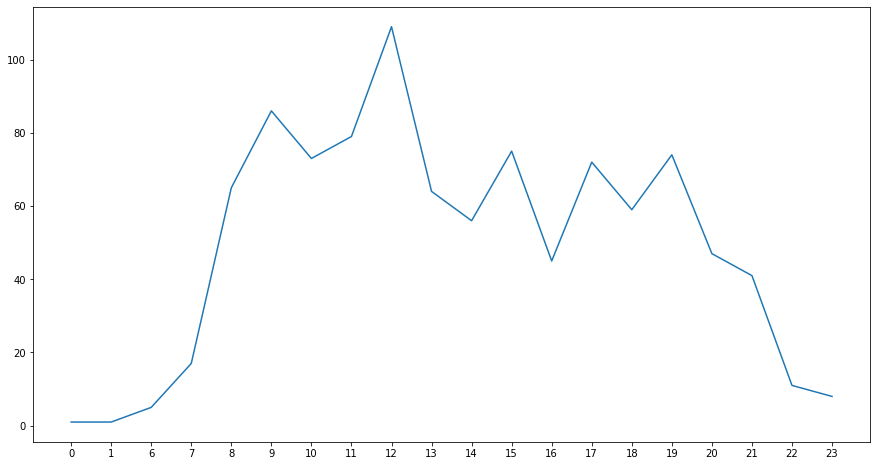

In [69]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [70]:
#整年貼文分佈
whole_year = chen[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,49
1,2019-02,46
2,2019-03,73
3,2019-04,91
4,2019-05,81
5,2019-06,75
6,2019-07,85
7,2019-08,90
8,2019-09,77
9,2019-10,83


In [71]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,76.000000
std,17.715342
min,46.000000
25%,73.000000
50%,81.000000
75%,85.000000
max,106.000000


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.


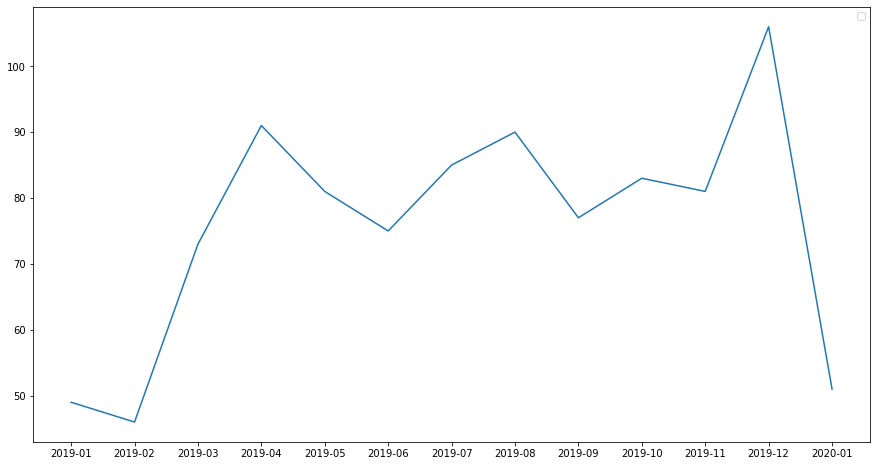

In [73]:
#畫出整年貼文分佈

labels = whole_year['month_year'].map(str)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, whole_year['post_id'])


ax.legend()

plt.show()

In [74]:
# 每個月按讚、評論、分享總數
results = chen.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,11994428035022728,17829,0,0,0,0,0,1309,1359,728
1,2019-02,11260075298184604,20546,0,0,0,0,0,1726,463,638
2,2019-03,17869249929727720,37629,0,0,0,0,0,7540,1525,1043
3,2019-04,22275366350756464,38967,0,0,0,0,0,3153,963,1350
4,2019-05,19827523894629384,60112,0,0,0,0,0,3917,983,1150
5,2019-06,18358818420953136,95464,0,0,0,0,0,4424,2319,993
6,2019-07,20806660877080216,57210,0,0,0,0,0,3733,2413,1150
7,2019-08,22030582105143756,121484,0,0,0,0,0,5724,3688,1256
8,2019-09,18848386912178552,70221,0,0,0,0,0,3272,1287,1047
9,2019-10,20317092385854800,102099,0,0,0,0,0,7398,4329,1115


#visulization

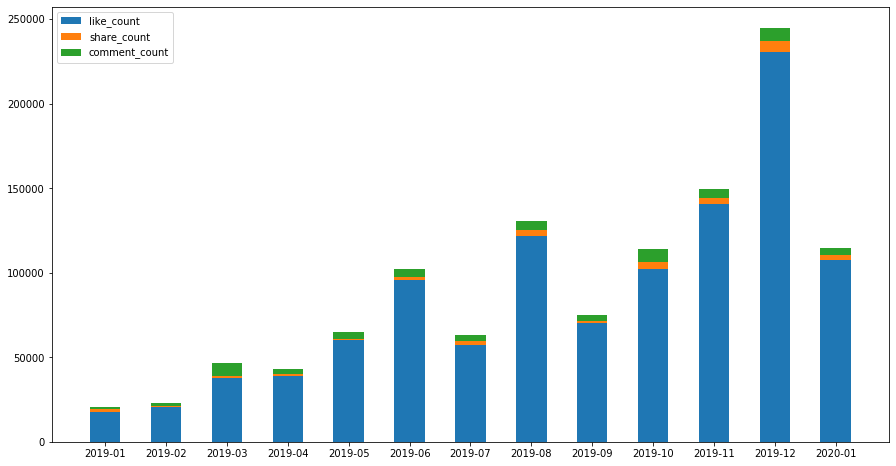

In [75]:
#整年按讚、評論、分享數 圖

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

In [79]:
# 很明顯12月按讚、分享、評論數很高，因此找出12月的資料
Dec = chen[chen.month_year == "2019-12"]
results_dec = Dec.groupby('new_date').sum()
results_dec.index.name = 'newhead' #更改欄位名稱
results_dec.reset_index(inplace=True)
results_dec

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-12-01,979136982450836,7269,0,0,0,0,0,185,215,47
1,2019-12-02,979136982450836,4750,0,0,0,0,0,208,270,52
2,2019-12-03,734352736838127,3260,0,0,0,0,0,83,98,42
3,2019-12-04,1468705473676254,3923,0,0,0,0,0,174,199,84
4,2019-12-05,979136982450836,5586,0,0,0,0,0,308,242,62
5,2019-12-06,734352736838127,5194,0,0,0,0,0,194,100,45
6,2019-12-07,979136982450836,21443,0,0,0,0,0,539,268,55
7,2019-12-08,734352736838127,10154,0,0,0,0,0,490,280,51
8,2019-12-09,734352736838127,10233,0,0,0,0,0,325,253,42
9,2019-12-10,734352736838127,4473,0,0,0,0,0,74,107,42


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.


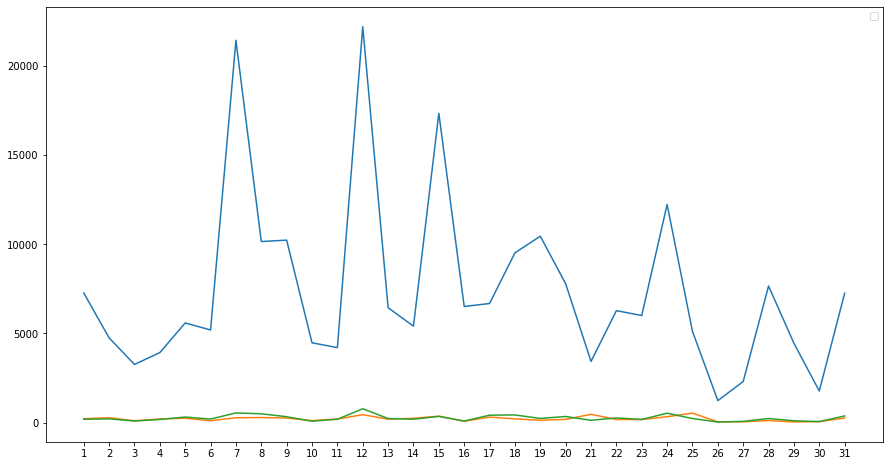

In [80]:
#看整個12月按讚、分享、評論的流量
labels = [str(i) for i in range(1,32)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_dec['like_count'])
ax.plot(labels, results_dec['share_count'])
ax.plot(labels, results_dec['comment_count'])

ax.legend()

plt.show()

In [116]:
#12月7號很明顯按讚總量很高 因此找出這天的文章
chen['new_date']=chen['new_date'].map(str)
Dec_7 = chen[chen['new_date'] == "2019-12-07"]
Dec_7[['message','like_count','type']].replace(r'\n', ' ', regex = True)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,message,like_count,type
834,#大溪行腳 應姐妹熱情要求，和大家現場共舞，跳的好嗎？來個掌聲，給勇氣鼓勵一下。,12233,video
835,馬前總統去年十二度來幫學聖掃街拉票，所到之處，要求簽名合照的馬迷太多太多！鄉親一直在問，馬總統何時再來？ ⏰１２月８日（週日）下午1點到2點30分，馬英九總統將在大溪老街跟學聖一起文化散步~~~ 🙏🙏邀請學聖的好友們， 下午1點， 和平路/康莊路口，一起開走~~~ 😍溫馨提醒😍， 明（12月8日）晚6點， 韓國瑜跟學聖的競選總部成立， 📍桃園市八德區金和路85號， 不見不散~~~,1701,photo
836,中醫界討論很久，希望建立中醫醫療品質管理制度、鼓勵中醫現代化發展，也希望依據發展數千年的中醫學理論來發展科學方法及技術，進行中醫在疾病預防、診斷、治療實證研究及中醫醫療器材研發。 我瞭解中醫界的需求後，主動擔任法案的共同提案人，昨（12月6日）立法院三讀通過「中醫藥發展法」。新法規定，中央主管機關應每五年定期訂定中醫藥發展計畫，同時應邀集中醫藥學者專家及產業界人士設中醫藥發展諮議會，定期召開會議，並得設置中醫藥研究基金 ，應促進中醫醫療資源均衡發展，完善偏鄉醫療照顧資源，鼓勵設立中醫醫療機構或各層級醫院設立中醫部門，發展中西醫合作，如建立眩暈急診、痛症急診及癌症治療等，並提供中醫戒毒等多元醫療服務。 相關新聞 中醫藥發展法三讀通過 強化健保中醫功能與角色 https://www.chinatimes.com/realtimenews/20191206002758-260407?chdtv,595,photo
837,#八德行腳 每個擊掌，都是一聲祝福，一回鼓勵！深深感恩！,6914,video


感覺按讚比較多的都跟 行腳? 有關 
因此此外發現最多讚的文章都是 'video' 因此去印證這個pattern

In [89]:
#陳學聖的最多讚數前50的文章 種類type
toplike_50 = liu.sort_values(by = ['like_count'],ascending=False).head(50)
toplike_50.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
type,,,,,,,,,,,,,,,,,,,,,
photo,18,18,18,18,18,0,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
video,32,32,32,32,31,9,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


發現按讚前50的文章中，過半都是video
然而在劉世芳的結果中，link - 3 , photo - 31 , video - 15 
所以陳學聖的客群比較喜歡看他發影片。

In [119]:
# 貼文總按讚數最高 
like_top10 = chen.sort_values('like_count',ascending=False).head(10)
like_top10 = like_top10[['post_id','message','like_count','type']]
like_top10 = like_top10.replace(r'\n',' ',regex=True) # message text preprocessing
like_top10

,post_id,message,like_count,type
370,244784245612709_2261911123900001,「韓粉現場 很感人」,26339,video
764,244784245612709_2548305281927249,韓國瑜在桃園2,16129,video
760,244784245612709_2551820134909097,#八德行腳 我在桃園榮家，陪榮民伯伯合唱梅花，雖然聲音已然嘶啞，但是對國家不變之愛，仍深深令人動容。,15120,video
919,244784245612709_2636728346418275,韓國瑜鐵衛車隊從中壢出發，展開環島之旅，特別和呂玉玲、魯明哲前來加油打氣！,14010,video
163,244784245612709_2145826465508468,我喜歡身份證上有國旗，你呢？想聽聽大家意見！聽說內政部準備明年十月換新身份證，國旗會消失。,12562,photo
834,244784245612709_2624337544324022,#大溪行腳 應姐妹熱情要求，和大家現場共舞，跳的好嗎？來個掌聲，給勇氣鼓勵一下。,12233,video
315,244784245612709_2249421151815665,清晨五點半就和團隊來到大漢溪畔，為參加健走民眾加油打氣！,11320,video
768,244784245612709_2545769358847508,今天韓國瑜來桃園感人的一幕,10795,video
412,244784245612709_2287161361374977,#大溪行腳 82歲阿公帶來仲夏夜的望春風,9966,video
521,244784245612709_2375276009230178,今晚，我們和韓國瑜在興仁公園相見歡！ 歷史會記錄這一刻！ 我們共同的見證！ 加油！,9629,photo


按讚最多的文章都會提到韓國瑜（模式和劉世芳），而且相比文章字數都很短且都是'video'

In [120]:
#按讚次數最少的貼文 
lastlike_10 = chen.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year','type']].replace(r'\n',' ',regex=True)

,message,like_count,month_year,type
171,為了不讓教師法修法，變成家長團體與教師團體「火車對撞」，我提議並與教委會委員共同提案：建請教委會在進入教師法修法逐條審查之前，先舉辦一場公聽會，讓家長團體、教師團體、以及教育部的專業聲音都能被聽見，最終因法定時間不夠，雖決定以【座談會】的名義進行，但實際上上就是【公聽會】的效力，並訂在本週三(4/17)舉辦，讓各界代表都能提出建言。相信如此才能審慎細緻地修出一部公平善待老師、又能真正保護孩子的教師法！,58,2019-04,video
282,一篇令我動容落淚的報導，感恩蘇醫師一生的付出 【腫瘤科醫師44歲癌逝 生前嘆「救人無數，想多活下去卻好難...」】 🔗http://sg.newsrepublic.net/s/hpypmcb,59,2019-05,link
229,陳學聖則認為「有人不想讓韓國瑜冒出頭，蔡英文也不想讓賴清德冒出頭」，至於韓國瑜真的委屈嗎？陳答，「他不能真的說要選，因為當市長沒有這麼久，如果說國民黨「徵召」就能化解韓國瑜困境，但『看到有人不想幫他化解困境』」陳學聖表示，有人不友善，韓國瑜可以贏，但是用很多種理由讓他沒辦法出來參選，明知道韓無法講想要選，故意要他講這句話，以至於韓最後表示願意被動承擔。 陳學聖希望韓國瑜冒出頭，「給他一個競爭的機會，也是設身處地為他著想」，如果初選形式太僵硬，他強調，「選不出最強還是沒有用，有很多種彈性作法，用三個月滾動式民調，最強就出來選，不一定是韓國瑜，但要讓韓粉能服氣就是要把韓算進去」。 相關新聞連結🔗 同樣「想承擔」賴清德照民主機制，韓國瑜卻不是？ 藍綠委這麼說… https://www.fountmedia.io/article/10290,73,2019-04,link
170,為了不讓教師法修法，變成家長團體與教師團體「火車對撞」，我提議並與教委會委員共同提案：建請教委會在進入教師法修法逐條審查之前，先舉辦一場公聽會，讓家長團體、教師團體、以及教育部的專業聲音都能被聽見，最終因法定時間不夠，雖決定以【座談會】的名義進行，但實際上上就是【公聽會】的效力，並訂在本週三(4/17)舉辦，讓各界代表都能提出建言。相信如此才能審慎細緻地修出一部公平善待老師、又能真正保護孩子的教師法！,79,2019-04,video
276,近年來「宅經濟」帶動不少美食外送平台崛起，消費者能省去麻煩又可享用美食，而商家也多了一條銷售的管道；然而，食品在運送過程中卻也可能潛藏著食安的漏洞。 我以去(2018)年8月發生的元山「黑心蛋」事件為例說明，當時元山蛋品經人檢舉被查獲使用變質腐敗的次級蛋加工製作蛋液產品，後來業者雖已遭裁罰並追究相關法律責任，但當初檢舉本案的吹哨者卻長時間無人聞問，直到9個月後才被桃園市政府通知可領取檢舉獎金10萬元；反觀同時期的台中市政府，面對同類案件，僅在案發1個月後就已經先行發放350萬元的高額獎金。 相關新聞連結🔗 美食外送平台將納食安管理 檢舉獎金惠而不實令「吹哨者」卻步 https://tw.news.yahoo.com/%E7%BE%8E%E9%A3%9F%E5%A4%96%E9%80%81%E5%B9%B3%E5%8F%B0%E5%B0%87%E7%B4%8D%E9%A3%9F%E5%AE%89%E7%AE%A1%E7%90%86-%E6%AA%A2%E8%88%89%E7%8D%8E%E9%87%91%E6%83%A0%E8%80%8C%E4%B8%8D%E5%AF%A6%E4%BB%A4%E3%80%8C-073944118.html,87,2019-05,link
169,為了不讓教師法修法，變成家長團體與教師團體「火車對撞」，我提議並與教委會委員共同提案：建請教委會在進入教師法修法逐條審查之前，先舉辦一場公聽會，讓家長團體、教師團體、以及教育部的專業聲音都能被聽見，最終因法定時間不夠，雖決定以【座談會】的名義進行，但實際上上就是【公聽會】的效力，並訂在本週三(4/17)舉辦，讓各界代表都能提出建言。相信如此才能審慎細緻地修出一部公平善待老師、又能真正保護孩子的教師法！,89,2019-04,video
156,【自來水公司龍潭廠工程 4/15停水影響4.7萬戶】 4月15日上午8點至晚上7點停水施工，共計停水11小時，停水區域包含龍潭、大溪全區及平鎮包含金陵路五～七段、東龍街、洪圳路、金雞湖路、金龍路、東豐路、福龍路一段、太平東（西）路、快速路一段、快速路二段125巷、東光路、星友街、龍祥路、廟前路、平東路（239、573、659、679巷）、新安里、東勢里、龍南路（654、666巷）、建安里、福林里、平等路（平東路至東光路），八德部分範圍包含瑞德里全部、八德區中山一路、八德區中山路（292巷至330巷）。 相關新聞連結🔗 自來水公司龍潭廠工程 4/15停水影響4.7萬戶 https://m.ltn.com.tw/news/life/breakingnews/2734425,90,2019-03,link
417,相關新聞 韓流吹起的「恐怖大媽」狂潮 「她」們在韓身上找到什麼認同？ https://fountmedia.io/article/23673 與大媽同世代的國民黨立委陳學聖接受《放言》詢問表示，「50以上人從韓國瑜身上，也許你的人生沒有那麼順遂，沒有那麼如意，但是你從韓國瑜身上你找到了一種人生的光榮感，你覺得與有榮焉，這是第一種心情。」 至於這些大媽為何不去認同更光鮮亮麗的藍營政治明星，像是蔣萬安？陳學聖表示，「蔣萬安只是一個小鮮肉而已啊，他沒有走過辛苦的歲月啊，他不會知道什麼叫做中華民國的光榮感。50歲以上的人包括我自己，走過的辛苦歲月，是現在人體會不來的，有辛苦、有打拼，現在突然被遺忘了。然後你過去所唱的歌變成沒人在唱…」 陳學聖認為，刺激這些韓粉，會讓他們更加團結，「要照顧上面長輩、下面晚輩，中間夾心層最辛苦的人，為什麼沒有看到他們？覺得我們這一代不能被疏忽、不能被遺忘…他們要把那個過去的光榮感找回來。在韓國瑜身上，他們突然發現他們找到了。」陳學聖強調，從世代角度看他們，會比較精準一點。,94,2019-07,link
263,【華航罷工苦了多少旅客，桃園市政府難道沒學到教訓，還要長榮也來一次罷工嗎？】 長榮空服員罷工越演越烈。桃園市空服員職業工會指出，桃園市勞動局公布的調查報告，當中薪資計算部分竟然不顧勞方建議，全部援引長榮資方說法，像是把餐費計算到薪資、年終獎金平均當成薪資等，都不合理且偏頗。工會今天至監察院遞送陳情書，要求監察委員調查桃園市勞動局，並提出糾正。 相關新聞連結🔗 長榮空服罷工／工會要求監察院調查桃園勞動局 https://udn.com/news/story/7241/3811402,96,2019-05,link
119,【體露金風】 翠巖嚼飯餵嬰兒 《宗門武庫》記載： 真淨克文和尚有時忽然喚侍者道：「拿老和尚來！」 侍者便將黃龍慧南祖師的寫真繪像展開。 真淨即以手拊著額太息道：「不是這老和尚，豈能如此？！」長長眺望，深思顰蹙半晌，方才戒慎弟子仔細收好。 日常閑居，每每總是如此。 與真淨為師兄弟，同師黃龍老南的潛庵清源禪師也如是，每一展見南禪師的寫真即潸然淚下、懷憶無止。 而大慧宗杲，這箇罵徧天下叢林、鋼釘般的鐵漢，每每時新一度、獲得當季菓品風物，必先供養佛和圓悟和尚，然後乃敢品嚐，並對左右言道：「非佛與老和尚，我安得如此？！」 「此是我之言語啊！一模一樣，恍然出自同一唇嘴，同一心腑──」《武庫》行頁的空白處，題寫著曩昔閱讀時的怦然：「自己亦恒常對著六祖像云：『非六祖，我則決不能如此！』恒恒思之，永誌不忘。以致，觀此言，格外親切。參禪人，若於師、於如來，不作此想，則也必難悟入。」 山野孤曠，廿個春秋暑往，臨崖孤獨，始終處於「師、友難能」之狀，於修証的艱危、深奧、玄疑處，僅能次次回歸經藏，參佐、諮詢於經卷，以及祖師、古德們的語錄與行狀。祖師們一箇箇「同生不同死」──道悟一如，卻情性烱然、風標各異……於所有矛盾、歧疑、窒礙、懸難處……最終，總回歸於《壇經》，取決於六祖。了然：一花五葉，無論何其巍峩、頡抗、 嶷……不離於此「曹源一滴」。如是，向本源，作最後的諮決、取擇。 以是，於修行的懸難、隘口，於菩薩道的陵夷、挫毀中，坐於六祖膝下，聆聽誨示，反而是至至慣常、熟習的況味。 無六祖、無諸祖師，無此一座座嚴列、晰明的路標與指陳，便不知如何熬涉過此踽行無人的孑孤與荒岸，也不知云何涉越過此重重蜮蜮、隸屬人性的黑山黑水──如斯架架橫陳、架架高聳的無明山與障礙山！ 且幸與祖師們為伴！有著他們的豁磊偕行，智眼為目，儀格、風標為量尺。 日日需要對晤，日日需要見師！以是，佛龕、書案上俱安置著六祖肖像，十七號舊宅如此，五十號禪堂亦然，到了閉關中心，卧榻正對著牆上便是六祖，於眠息前，總要凝觀一會。闃暗中，思此無上法門。 著相嗎？ 不，只怕著得不深、不切、不力！未能將此凡夫肉軀﻿騰騰轉入相中，銷融、消化入空；只存「他」！ 一名圓滿的修証者。 經藏、書頁中來的，尚如此；況乎曾獲得師、法，活生生、立體體地，呼吸存在、指授調教、威殺棒喝、指陳見性的？ 法身性命之恩，大於須彌、巨海；在於，賴此一悟，得以摧破千劫、百劫、累世繫銬的「輪廻之柱」，得見與諸佛、菩薩不二的法性。以致，唐時永嘉玄覺要稱嘆道：「不思議，解脫力，妙用恒砂也無極！四事供養敢辭勞？萬兩黃金亦消得，粉身碎骨未足酬──」 以致，真淨、潛庵、大慧……宛如同一咽喉、唇齒，並不份外。它僅是受用佛法，獲致關鍵性的啟明的法子所應有、須有的

發現按讚數最少的貼文都在3~5月，但是他的貼文數量在這幾個月是上升的 
貼文逐月變多  按讚數量也是有上升趨勢，但是為何最少讚的貼文都集中在這幾個月？ 
估計是因為文章數量變多，有種濫發文章的感覺，導致讚數被稀釋掉

In [121]:
#從列出評論數（互動數）最高的一天
comment_top20 = chen.sort_values('comment_count',ascending=False).head(10)
comment_top20 = comment_top20[['message','comment_count','type']]
comment_top20 = comment_top20.replace(r'\n',' ',regex=True) # message text preprocessing
comment_top20

,message,comment_count,type
163,我喜歡身份證上有國旗，你呢？想聽聽大家意見！聽說內政部準備明年十月換新身份證，國旗會消失。,4425,photo
703,贏回我們失落多年的共同夢想 請為我加油，我們一同偕行💪💪💪 感恩♥️ 政治獻金捐款帳戶資訊 http://yuanchen.enlightened-mirror.tw/_web/index.php,1381,link
370,「韓粉現場 很感人」,1263,video
291,NaN,1188,photo
768,今天韓國瑜來桃園感人的一幕,915,video
764,韓國瑜在桃園2,778,video
521,今晚，我們和韓國瑜在興仁公園相見歡！ 歷史會記錄這一刻！ 我們共同的見證！ 加油！,747,photo
259,與國瑜、佳芬夫妻在高雄，好友相聚，互相加油！,721,photo
522,再累也要回來恢復原狀 謝謝里長以及志工的協助 公園附近的住戶，打擾了，不好意思 祝大家假日愉快～ PS. 我燒聲了所以講話比較小聲...,666,video
919,韓國瑜鐵衛車隊從中壢出發，展開環島之旅，特別和呂玉玲、魯明哲前來加油打氣！,660,video


可以看出多數comment多的貼文用字都比較和緩一點，用字少
此外很多 video

In [122]:
#按讚次數最少的貼文 
lesscomment_10 = chen.sort_values(by = ['comment_count'],ascending = True).head(10)
lesscomment_10[['message','comment_count','month_year']].replace(r'\n',' ',regex=True)

message  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

發現很多都是跟宗教有關 

In [123]:
# 整年 貼文分享數最高 
share_top10 = liu.sort_values('share_count',ascending=False).head(10)
share_top10 = share_top10[['message','share_count','type']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,share_count,type
370,「韓粉現場 很感人」,957,video
768,今天韓國瑜來桃園感人的一幕,857,video
163,我喜歡身份證上有國旗，你呢？想聽聽大家意見！聽說內政部準備明年十月換新身份證，國旗會消失。,797,photo
2,【桃園客家局 慶功宴？泰國行一人八萬！ 】 -------------- https://tw.news.appledaily.com/new/realtime/20190114/1500406,608,link
521,今晚，我們和韓國瑜在興仁公園相見歡！ 歷史會記錄這一刻！ 我們共同的見證！ 加油！,551,photo
547,【韓國瑜一趟未能成行的823金門之旅】 去年823砲戰紀念60週年，民進黨說這是國共內戰，所以小英不來金門。今年是大選年，小英來金門了，但說的是【中華民國台灣】，金門、馬祖又在那裡？ 這裡面充滿了太多的政治算計，不論在金門，或在台北【柯郭王】的合框，真正的主角，真正的英雄反而不見了，尤其是烈士遺族！ 我要說這段話的原因是，過去這一個月來，823砲戰陣亡烈士遺族一直和我密切聯繫，希望能在823砲戰61週年活動，邀請韓國瑜陪他們一起去金門，讓他們表達深深的感謝。 因為二十年前，韓國瑜還在擔任立委時，是最為823烈士遺族爭取權利的。就像和我連絡的郭先生，三歲時，爸爸就在823砲戰陣亡，母親傷心過度，四年後也走了，只留下一家孤兒徬徨無依。 直到韓國瑜任立委時，開始高度關注遺族的權益，這問題才逐漸獲得重視，也才促成後來40週年、50週年、60週年遺族得以獲邀前往金門參加追思活動。 從郭先生傳來的照片，當年應是唐飛作行政院長的時候，時任立委的韓國瑜靜靜在旁陪同，這是二十年前首次邀請遺族參加在金門的追思活動。我那時也在立法院，和國瑜是同事，如果不是郭先生這回請我代邀韓國瑜，我都不甚清楚背後這段往事！ 雖然韓國瑜最終未能前往，但真的照片會說話，沒什麼特別用意，只是敘說了一趟未能成行旅程的幕後鮮為人知的過往。,515,photo
534,滿朝盡是酬庸，難道你不生氣嗎？~立法院國民黨團整理,486,photo
877,國民黨立委陳學聖昨披露兩位大學教授的親友近日因為在網路討論「蔡英文假學位」等訊息而遭警方約談或遭調查局交辦而移送，呼籲執政當局把髒手移開，不要再讓檢調警當自己鷹爪。蔡政府為打擊假消息，近日動作不少，不少案例被依法函送，已經引發寒蟬效應。 相關新聞： 聯合 不能批小英？貼張照片警察就上門 深綠學者也怒了 https://udn.com/news/story/6656/4247275 質疑蔡英文論文 惹上官司,478,link
764,韓國瑜在桃園2,440,video
339,高雄旅展到底有誰參加了？為何獨獨要挑高雄、要黑韓？~ 香港【反送中】運動受到國際矚目是事實，台灣是否要此時要參加香港旅展，也是一個可以討論的政治議題。但不明瞭的是，去的中央、地方單位那麼多，為何獨獨挑高雄，為何只黑韓，照民進黨的形容，好像只有韓國瑜【在傷口灑鹽】？但事實真象呢？ 在香港的朋友看不過去，拍了幾張旅展的現場照片給我，有中央客委會、地方無黨執政的台北市、民進黨執政的屏東縣、基隆市……實際上，不只這些單位，中央還有觀光局各國家公園管理處、退輔會農場，連工研院都派團參加。 再進一步瞭解，香港旅展是交通部觀光局主辦，委託台灣觀光協會承接，而協會理事長就是民進黨前交通部長葉菊蘭。很清楚了，這就是中央主辦，地方政府配合，不分藍綠，就是希望邀請更多的外國人來台灣觀光，愛上台灣的美。 這本是好事，現卻被拿來作政治文章，若要作就來作，若不要在此時此刻對香港傷口灑鹽，身為主辦單位的交通部觀光局，只要一聲令下，要求抵制不參加，相信從中央到地方，一定會一條心，全力配合。 但民進黨沒這樣作，反而只挑高雄出來打，獨獨只黑韓，這種政治操作也未免令人不齒。 再說一次，此時此刻香港旅展是否要參加，是可以討論，但請公平一些。,381,photo


發現次數最多的也幾乎都是提及 韓國瑜

In [124]:
promise = politics[politics.姓名 == "陳學聖"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['25    一、「桃園起飛，中壢領航」',
 '這是鄉親的期待∼全力促成機場捷運早日通車，串連 桃園國際機場、台鐵、高鐵國內三大交通建設，讓中壢成為台灣重要轉運中心，並 結合在地教育、工業資源，由中壢領航，帶動桃園起飛',
 '二、「紛擾的年代，正直的良心」',
 '這是自我的期許∼從政多年，主張公平，堅守正 義，只問是非，回歸民意，一直是學聖問政的鮮明風格。值此紛亂、憂擾的年代， 不論外界如何風風雨雨，如何用綠營外圍團體扭曲評鑑打擊我，學聖正直的良心永 遠熾熱，永遠不會改變',
 '三、「責任、承擔、向前行」',
 '這是問政的理念∼此時的心境，真有如「攜取詩書歸 舊隱，野花啼鳥一般春」的寫照。問我，對當今時局是否會灰心，答案是∼會；問 我是否該退縮，答案卻又是∼不該。在這種擺盪、矛盾中，幾經思慮長考，我最終 選擇了承擔，承認這是自己無法放下的責任，承諾將和許許多多、與我對這社會仍 抱持著一份信念的伙伴們，〝天下為公〞為理想，繼續堅持，我們再一同偕行、一 同執著，再試一次、大步向前行。']